In [95]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels import tsa
import statsmodels.graphics as sg
import sklearn


import matplotlib.pylab as plt

import seaborn as sns
sns.set_theme()

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('../data/ts.csv', index_col=0, parse_dates=True)
df.shape

(43, 11)

In [3]:
df.head()

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb
2014-03-31,6193.211456,100.6,100.2,0.0446,41942.0,104.2,-20.5,-16.3,13.5,105.5,103.8
2014-06-30,6227.984614,100.3,100.0,0.0447,45499.0,104.1,-16.8,-15.0,12.0,105.1,103.9
2014-09-30,6357.260998,99.7,99.5,0.0443,43653.0,103.3,-16.9,-12.7,11.5,102.6,104.2
2014-12-31,6438.874574,99.3,99.6,0.0388,42993.0,103.3,-13.8,-10.7,11.4,103.7,103.9
2015-03-31,6473.616559,98.5,99.5,0.0348,42169.0,104.0,-14.9,-11.5,11.5,104.4,104.3


In [10]:
df.dtypes

rynek               float64
inflacja_r          float64
inflacja_q          float64
stopa_procentowa    float64
liczba_kredytow     float64
tempo_wzrostu       float64
ufnosc              float64
duze_zakupy         float64
bezrobocie          float64
spr_detaliczna      float64
pkb                 float64
dtype: object

In [4]:
df.isna().sum(axis=0)

rynek               0
inflacja_r          0
inflacja_q          0
stopa_procentowa    0
liczba_kredytow     0
tempo_wzrostu       0
ufnosc              0
duze_zakupy         0
bezrobocie          0
spr_detaliczna      0
pkb                 0
dtype: int64

In [5]:
df.columns

Index(['rynek', 'inflacja_r', 'inflacja_q', 'stopa_procentowa',
       'liczba_kredytow', 'tempo_wzrostu', 'ufnosc', 'duze_zakupy',
       'bezrobocie', 'spr_detaliczna', 'pkb'],
      dtype='object')

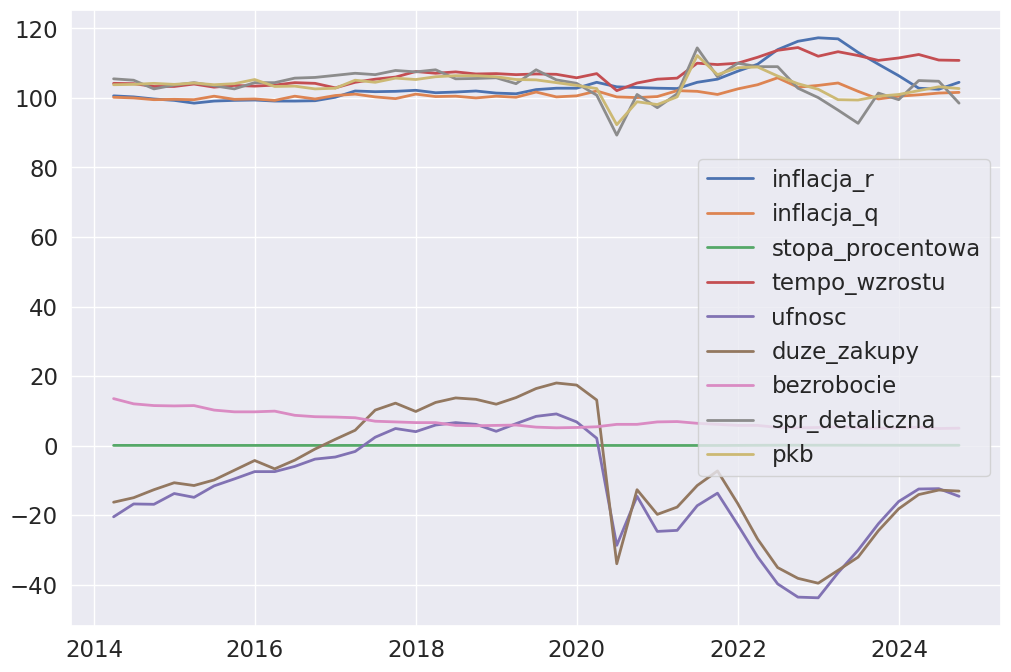

In [24]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
for col in ['inflacja_r', 'inflacja_q', 'stopa_procentowa',
        'tempo_wzrostu', 'ufnosc', 'duze_zakupy',
       'bezrobocie', 'spr_detaliczna', 'pkb']:
    ax.plot(df[col], lw=2, label=col)
ax.legend()
fig.savefig("../images/all_columns.png")


In [12]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(df)
scaled_df[:5]

array([[0.        , 0.11170213, 0.13846154, 0.30088496, 0.46086364,
        0.16935484, 0.44045369, 0.40451389, 1.        , 0.64541833,
        0.57788945],
       [0.00395367, 0.09574468, 0.10769231, 0.30235988, 0.53210623,
        0.16129032, 0.51039698, 0.42708333, 0.8255814 , 0.62948207,
        0.58291457],
       [0.01865226, 0.06382979, 0.03076923, 0.29646018, 0.49513299,
        0.09677419, 0.50850662, 0.46701389, 0.76744186, 0.52988048,
        0.59798995],
       [0.02793164, 0.04255319, 0.04615385, 0.21533923, 0.48191396,
        0.09677419, 0.56710775, 0.50173611, 0.75581395, 0.57370518,
        0.58291457],
       [0.03188177, 0.        , 0.03076923, 0.15634218, 0.46541019,
        0.15322581, 0.5463138 , 0.48784722, 0.76744186, 0.60159363,
        0.60301508]])

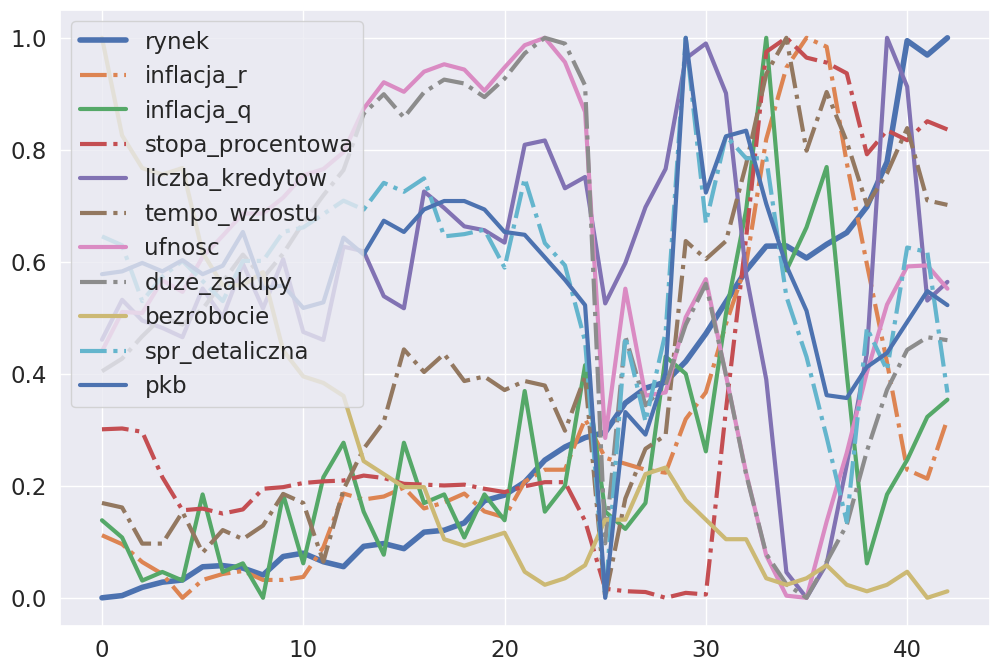

In [27]:

fig = plt.figure(figsize=(12,8))
ax = fig.gca()
for ind, col in enumerate(df.columns):
    ax.plot(scaled_df[:,ind] , lw=(4 if col == "rynek" else 3), ls=("-" if ind%2==0 else "-."), label=col)
ax.legend()
fig.savefig("../images/all_columns_scaled.png")

### Resampling

In [34]:
df.head()

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb
2014-03-31,6193.211456,100.6,100.2,0.0446,41942.0,104.2,-20.5,-16.3,13.5,105.5,103.8
2014-06-30,6227.984614,100.3,100.0,0.0447,45499.0,104.1,-16.8,-15.0,12.0,105.1,103.9
2014-09-30,6357.260998,99.7,99.5,0.0443,43653.0,103.3,-16.9,-12.7,11.5,102.6,104.2
2014-12-31,6438.874574,99.3,99.6,0.0388,42993.0,103.3,-13.8,-10.7,11.4,103.7,103.9
2015-03-31,6473.616559,98.5,99.5,0.0348,42169.0,104.0,-14.9,-11.5,11.5,104.4,104.3


/tmp/ipykernel_405745/3238300708.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_df = df.resample(rule='Y').mean()


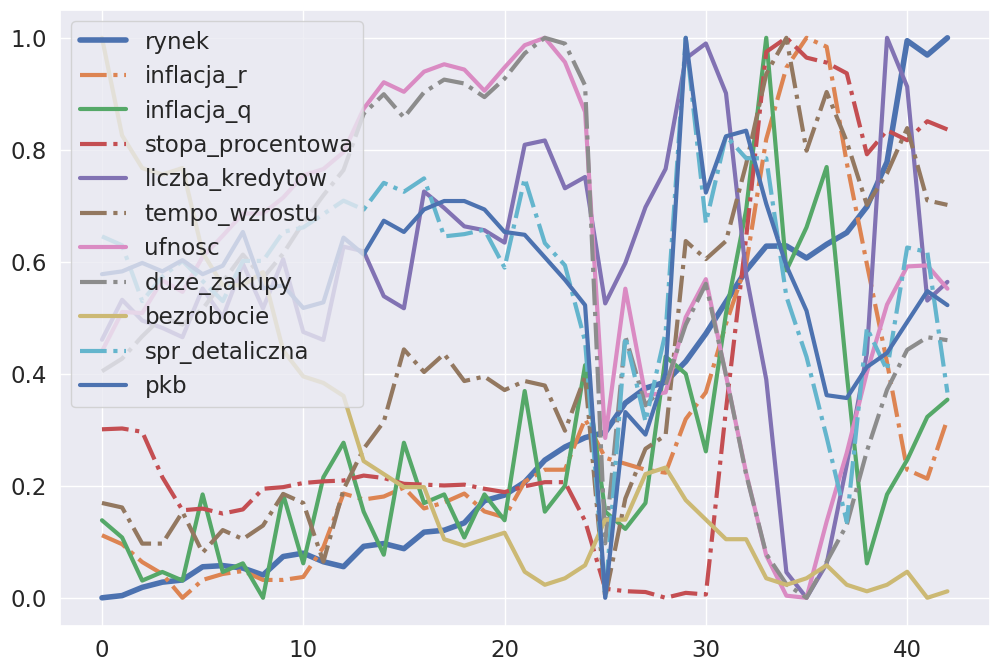

In [39]:
annual_df = df.resample(rule='Y').mean()

annual_scaled_arr = sklearn.preprocessing.MinMaxScaler().fit_transform(df)
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
for ind, col in enumerate(df.columns):
    ax.plot(annual_scaled_arr[:,ind] , lw=(4 if col == "rynek" else 3), ls=("-" if ind%2==0 else "-."), label=col)
ax.legend()
fig.savefig("../images/annual_scaled.png")

In [41]:
annual_scaled_arr.shape

(43, 11)

In [ ]:
for col in df.columns:
    fig = plt.figure(figsize=(6, 3))
    plt.title(col)
    plt.plot(df[col], lw=2, label=col)
    
    fig.savefig(f"../images/plot_column_{col}.png")
# plt.legend()

In [28]:
df.describe().T.to_markdown()

'|                  |   count |          mean |           std |        min |       25% |        50% |        75% |       max |\n|:-----------------|--------:|--------------:|--------------:|-----------:|----------:|-----------:|-----------:|----------:|\n| rynek            |      43 |  8969.26      |  2597.47      |  6193.21   |  6800.58  |  8010.31   | 11087.5    | 14988.4   |\n| inflacja_r       |      43 |   103.826     |     5.05494   |    98.5    |   100.45  |   102.4    |   104.5    |   117.3   |\n| inflacja_q       |      43 |   100.984     |     1.43061   |    99.3    |   100.05  |   100.5    |   101.65   |   105.8   |\n| stopa_procentowa |      43 |     0.0480442 |     0.0219191 |     0.0242 |     0.036 |     0.0382 |     0.0574 |     0.092 |\n| liczba_kredytow  |      43 | 48104.1       | 11237.7       | 18932      | 43323     | 47767      | 54456      | 68860     |\n| tempo_wzrostu    |      43 |   107.219     |     3.49995   |   102.1    |   104.2   |   106.8    |   110.4  

In [46]:
a = (np.arange(20)**2).reshape(4, 5)
a, np.diff(a=a, axis=0)

(array([[  0,   1,   4,   9,  16],
        [ 25,  36,  49,  64,  81],
        [100, 121, 144, 169, 196],
        [225, 256, 289, 324, 361]]),
 array([[ 25,  35,  45,  55,  65],
        [ 75,  85,  95, 105, 115],
        [125, 135, 145, 155, 165]]))

In [69]:
sdf = np.diff(a=df.to_numpy(), n=1, axis=0)
sdf.shape, sdf[:5]

((42, 11),
 array([[ 3.47731586e+01, -3.00000000e-01, -2.00000000e-01,
          1.00000000e-04,  3.55700000e+03, -1.00000000e-01,
          3.70000000e+00,  1.30000000e+00, -1.50000000e+00,
         -4.00000000e-01,  1.00000000e-01],
        [ 1.29276383e+02, -6.00000000e-01, -5.00000000e-01,
         -4.00000000e-04, -1.84600000e+03, -8.00000000e-01,
         -1.00000000e-01,  2.30000000e+00, -5.00000000e-01,
         -2.50000000e+00,  3.00000000e-01],
        [ 8.16135760e+01, -4.00000000e-01,  1.00000000e-01,
         -5.50000000e-03, -6.60000000e+02,  0.00000000e+00,
          3.10000000e+00,  2.00000000e+00, -1.00000000e-01,
          1.10000000e+00, -3.00000000e-01],
        [ 3.47419858e+01, -8.00000000e-01, -1.00000000e-01,
         -4.00000000e-03, -8.24000000e+02,  7.00000000e-01,
         -1.10000000e+00, -8.00000000e-01,  1.00000000e-01,
          7.00000000e-01,  4.00000000e-01],
        [ 2.06737213e+02,  6.00000000e-01,  1.00000000e+00,
          2.00000000e-04,  4.3350

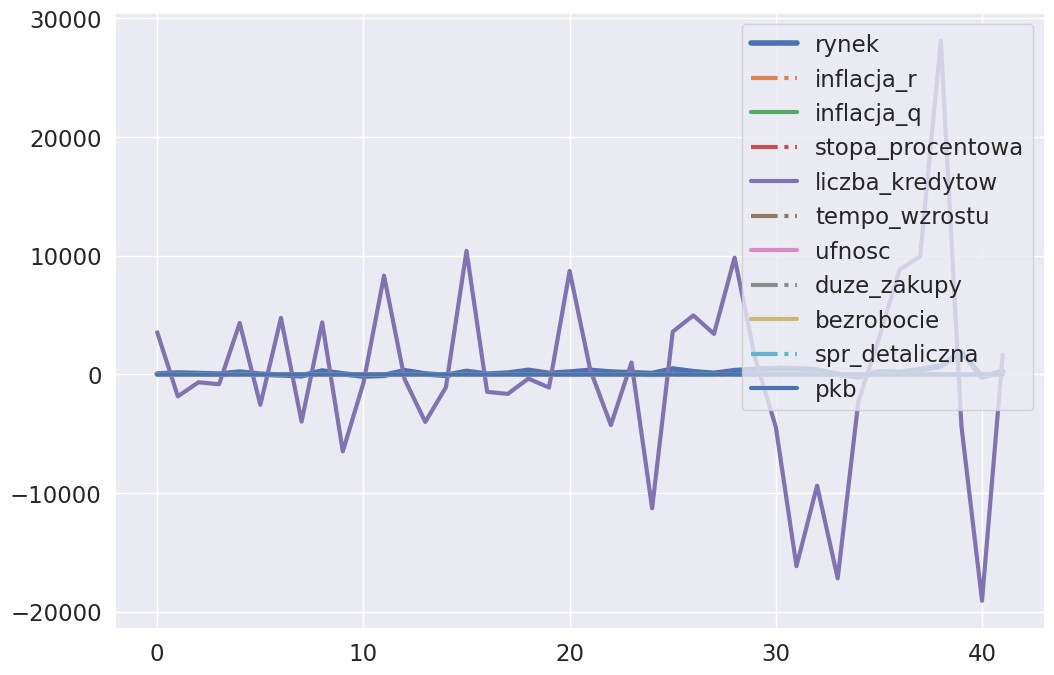

In [70]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
for ind, col in enumerate(df.columns):
    ax.plot(sdf[:,ind] , lw=(4 if col == "rynek" else 3), ls=("-" if ind%2==0 else "-."), label=col)
ax.legend()
fig.savefig("../images/all_columns_diff_1.png")

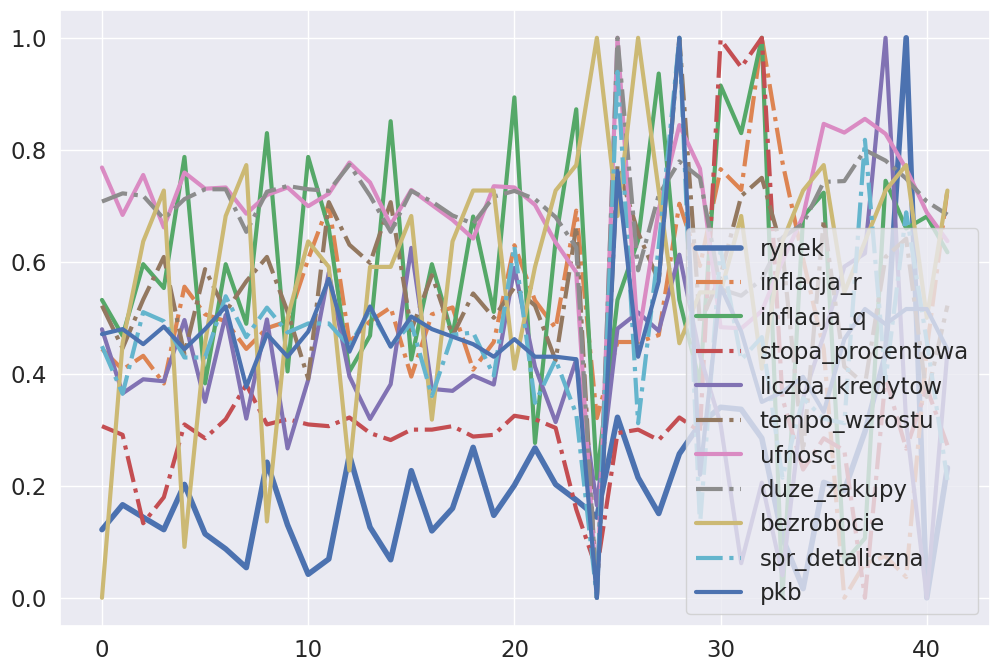

In [71]:
fig = plt.figure(figsize=(12,8))
ssdf = sklearn.preprocessing.MinMaxScaler().fit_transform(sdf)
ax = fig.gca()
for ind, col in enumerate(df.columns):
    ax.plot(ssdf[:,ind] , lw=(4 if col == "rynek" else 3), ls=("-" if ind%2==0 else "-."), label=col)
ax.legend()
fig.savefig("../images/all_columns_diff_1_scaled.png")

In [72]:
temp_df = pd.DataFrame(data=sdf)
temp_df.describe() #.T.to_markdown()

,0,1,2,3,4,5,6,7,8,9,10
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.00000
mean,209.408438,0.092857,0.033333,0.000864,122.809524,0.157143,0.140476,0.076190,-0.202381,-0.166667,-0.02619
std,336.426490,1.604930,1.103137,0.006398,8181.222928,1.438350,6.786323,9.040014,0.463017,4.538113,3.03637
min,-224.463886,-3.900000,-2.700000,-0.009800,-19070.000000,-4.900000,-30.800000,-47.100000,-1.500000,-11.500000,-10.40000
25%,34.749779,-0.300000,-0.500000,-0.000675,-3618.750000,-0.475000,-1.050000,-1.250000,-0.400000,-2.575000,-0.80000
50%,165.483745,0.050000,0.100000,-0.000100,-535.500000,0.250000,1.100000,1.950000,-0.100000,-0.300000,-0.05000
75%,321.773664,0.975000,0.775000,0.000500,4152.000000,0.875000,3.250000,2.800000,0.100000,1.000000,0.72500
max,1904.918364,4.200000,2.000000,0.022500,28111.000000,4.300000,14.100000,21.300000,0.700000,13.200000,11.90000


In [ ]:

ssdf = sklearn.preprocessing.MinMaxScaler().fit_transform(sdf)

for ind, col in enumerate(df.columns):
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca()
    ax.plot(ssdf[:,ind] , lw=(4 if col == "rynek" else 3), ls=("-" if ind%2==0 else "-."), label=col)
    ax.legend()
    fig.savefig(f"../images/all_columns_diff_1_scaled_{col}.png")
    plt.show()

In [77]:
a = (np.arange(10)**4)
a, np.diff(a, 1), np.diff(a, 2), np.diff(a, 3)

(array([   0,    1,   16,   81,  256,  625, 1296, 2401, 4096, 6561]),
 array([   1,   15,   65,  175,  369,  671, 1105, 1695, 2465]),
 array([ 14,  50, 110, 194, 302, 434, 590, 770]),
 array([ 36,  60,  84, 108, 132, 156, 180]))

In [78]:
df.head()

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb
2014-03-31,6193.211456,100.6,100.2,0.0446,41942.0,104.2,-20.5,-16.3,13.5,105.5,103.8
2014-06-30,6227.984614,100.3,100.0,0.0447,45499.0,104.1,-16.8,-15.0,12.0,105.1,103.9
2014-09-30,6357.260998,99.7,99.5,0.0443,43653.0,103.3,-16.9,-12.7,11.5,102.6,104.2
2014-12-31,6438.874574,99.3,99.6,0.0388,42993.0,103.3,-13.8,-10.7,11.4,103.7,103.9
2015-03-31,6473.616559,98.5,99.5,0.0348,42169.0,104.0,-14.9,-11.5,11.5,104.4,104.3


In [80]:
df.describe()

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,8969.261476,103.825581,100.983721,0.048044,48104.139535,107.218605,-12.034884,-7.934884,7.095349,103.939535,103.711628
std,2597.466115,5.054941,1.430606,0.021919,11237.663947,3.499949,14.807766,16.879163,2.321222,4.513954,3.245158
min,6193.211456,98.500000,99.300000,0.024200,18932.000000,102.100000,-43.800000,-39.600000,4.900000,89.300000,92.300000
25%,6800.584386,100.450000,100.050000,0.036000,43323.000000,104.200000,-21.500000,-17.200000,5.300000,102.000000,102.650000
50%,8010.311232,102.400000,100.500000,0.038200,47767.000000,106.800000,-12.500000,-10.700000,6.100000,104.800000,103.900000
75%,11087.526498,104.500000,101.650000,0.057400,54456.000000,110.400000,2.250000,10.000000,8.250000,106.300000,105.300000
max,14988.365863,117.300000,105.800000,0.092000,68860.000000,114.500000,9.100000,18.000000,13.500000,114.400000,112.200000


In [82]:
sdiff_arr = df.to_numpy()[4:] - df.to_numpy()[:-4]

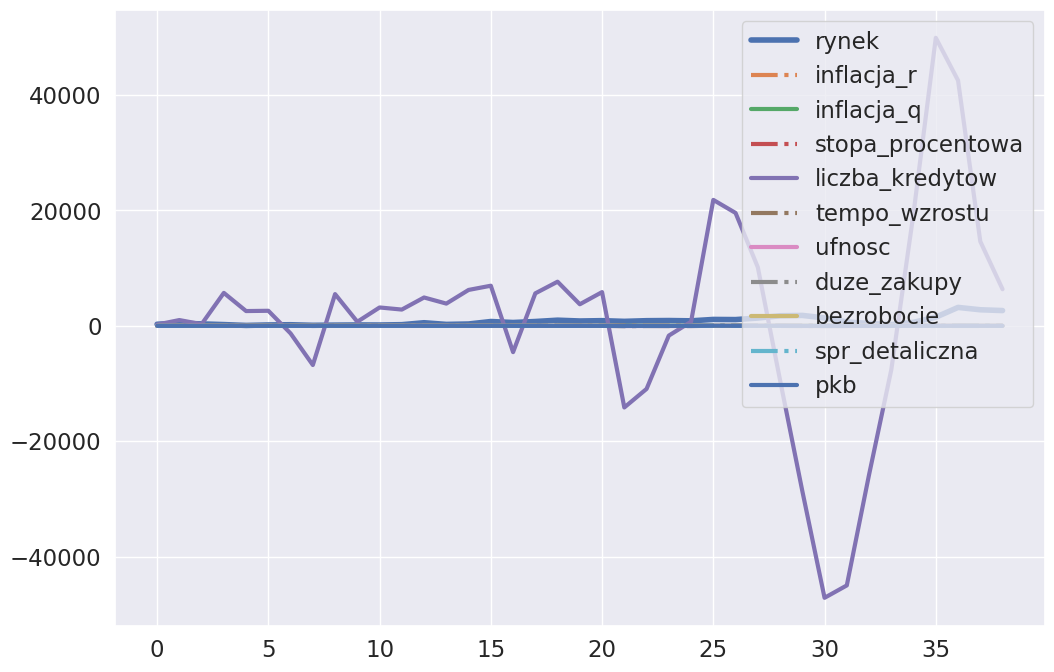

In [83]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
for ind, col in enumerate(df.columns):
    ax.plot(sdiff_arr[:,ind] , lw=(4 if col == "rynek" else 3), ls=("-" if ind%2==0 else "-."), label=col)
ax.legend()
fig.savefig("../images/seasonal_diff_4.png")

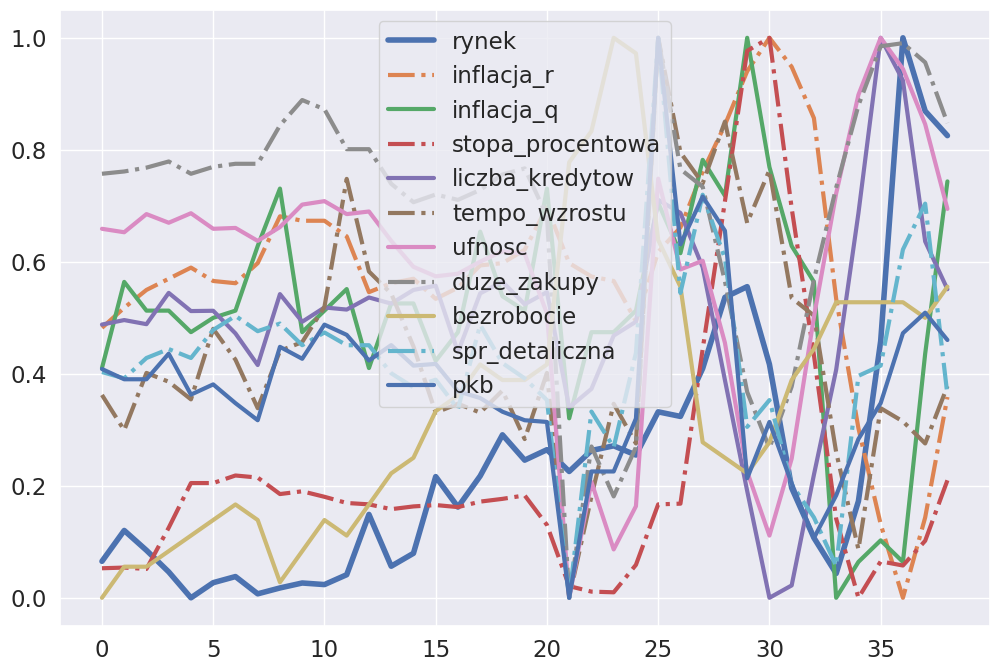

In [85]:
fig = plt.figure(figsize=(12,8))
sdf_arr_scaled = sklearn.preprocessing.MinMaxScaler().fit_transform(sdiff_arr)
ax = fig.gca()
for ind, col in enumerate(df.columns):
    ax.plot(sdf_arr_scaled [:,ind] , lw=(4 if col == "rynek" else 3), ls=("-" if ind%2==0 else "-."), label=col)
ax.legend()
fig.savefig("../images/seasonal_diff_4_scaled.png")

In [93]:
seasonal_stat_df = pd.DataFrame(data=sdiff_arr)
seasonal_stat_df.columns = df.columns
seasonal_stat_df.index = df.index[:-4]
seasonal_stat_df.head()

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb
2014-03-31,280.405104,-2.1,-0.7,-0.0098,227.0,-0.2,5.6,4.8,-2.0,-1.1,0.5
2014-06-30,452.369158,-1.2,0.5,-0.0097,1005.0,-1.0,5.2,5.1,-1.8,-1.6,-0.1
2014-09-30,341.666604,-0.4,0.1,-0.0099,292.0,0.3,7.3,5.6,-1.8,0.0,-0.1
2014-12-31,221.423795,0.1,0.1,-0.0039,5714.0,0.1,6.3,6.4,-1.7,0.7,1.4
2015-03-31,77.017513,0.6,-0.2,0.0026,2566.0,-0.3,7.4,4.8,-1.6,0.0,-1.0


In [99]:
_, _, _, pval_monthly_mean = tsa.stattools.acf(seasonal_stat_df["rynek"], nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:',
np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


In [87]:
pd.DataFrame(data=sdiff_arr).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,832.568884,0.417949,0.130769,0.003867,1328.487179,0.789744,0.317949,-0.089744,-0.720513,-0.233333,-0.174359
std,760.393782,5.086715,1.590788,0.019379,18108.344463,2.626564,15.028970,17.135740,0.920577,7.561827,5.593498
min,77.017513,-14.200000,-3.900000,-0.014100,-47135.000000,-4.800000,-37.100000,-50.400000,-2.000000,-18.800000,-12.900000
25%,237.209871,-0.650000,-0.200000,-0.007300,-3122.500000,-0.600000,-2.050000,0.200000,-1.500000,-3.100000,-2.550000
50%,688.974899,0.200000,0.100000,-0.000500,2824.000000,0.100000,4.200000,4.800000,-0.800000,-0.400000,-0.400000
75%,1036.651342,2.550000,1.000000,0.002600,6289.000000,1.900000,7.500000,8.000000,-0.100000,2.150000,1.850000
max,3198.018699,10.900000,3.900000,0.067400,49928.000000,7.900000,27.700000,22.500000,1.600000,25.100000,19.900000


In [86]:
pd.DataFrame(data=sdf_arr_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.242086,0.582388,0.516765,0.220450,0.499299,0.440137,0.577437,0.690127,0.355413,0.422931,0.387977
std,0.243638,0.202658,0.203947,0.237784,0.186563,0.206816,0.231929,0.235058,0.255716,0.172251,0.170533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.051327,0.539841,0.474359,0.083436,0.453443,0.330709,0.540895,0.694102,0.138889,0.357631,0.315549
50%,0.196077,0.573705,0.512821,0.166871,0.514707,0.385827,0.637346,0.757202,0.333333,0.419134,0.381098
75%,0.307476,0.667331,0.628205,0.204908,0.550405,0.527559,0.688272,0.801097,0.527778,0.477221,0.449695
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
